In [1]:
import numpy as np
from scipy import fft
from matplotlib import pyplot

In [2]:
z_r = -17.0
z_a = 10.0
z_b = 30.0

pupil_diameter = 5.0

size_r = 5.5
min_size_a = size_r * z_a / abs(z_r) + pupil_diameter
min_size_b = size_r * z_b / abs(z_r) + pupil_diameter

size_a = min_size_a
size_b = min_size_b

res_r = 256
res_a = 8
res_b = 8

pitch_r = size_r / res_r
pitch_a = size_a / res_a
pitch_b = size_b / res_b

xi_r = 0.5 / pitch_r
xi_a = 0.5 / pitch_a
xi_b = 0.5 / pitch_b

ss_factor = 3

res_A = res_a * ss_factor
res_B = res_b * ss_factor
pitch_A = size_a / res_A
pitch_B = size_b / res_B
xi_A = 0.5 / pitch_A
xi_B = 0.5 / pitch_B

z_f = 1000.0

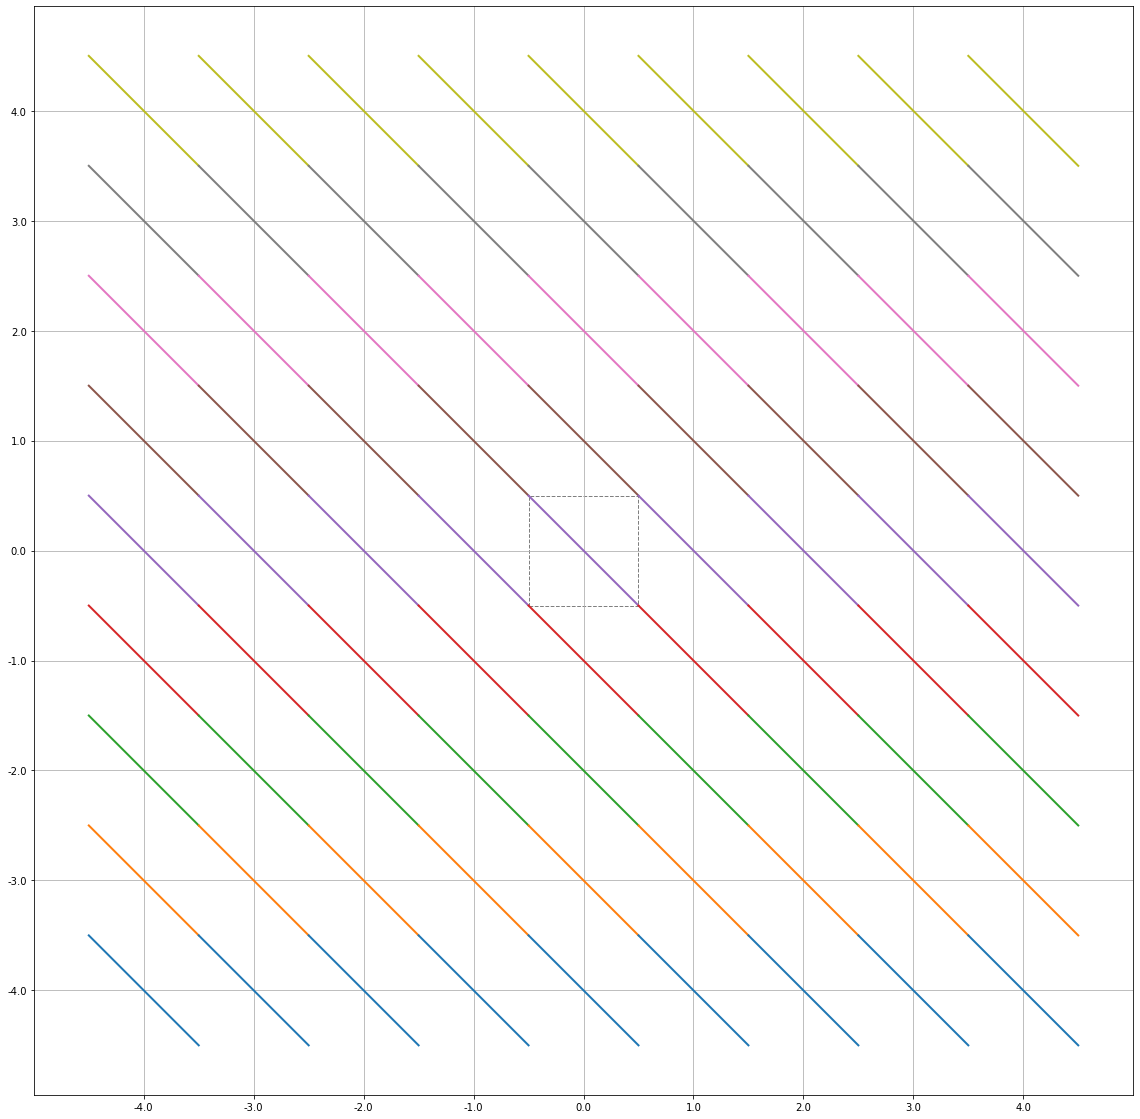

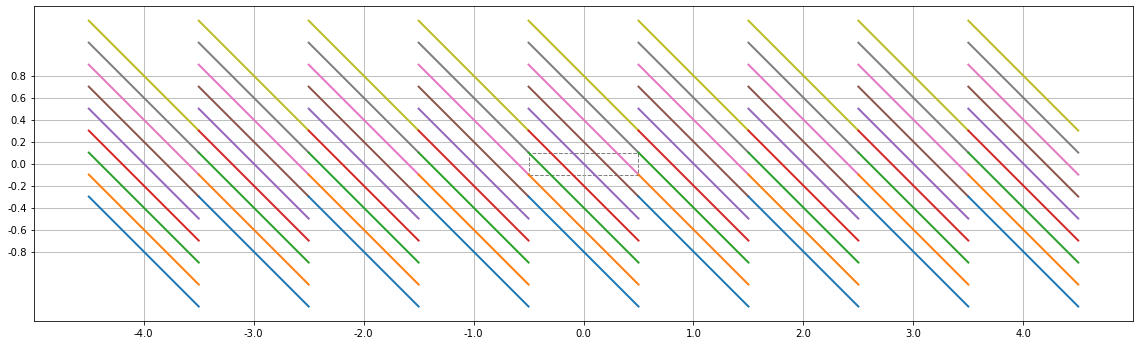

In [3]:
def plot_packing(delta_a, delta_b):
    periodic_a = (np.arange(9) - 4) * delta_a
    periodic_b = (np.arange(9) - 4) * delta_b
    fig, ax = pyplot.subplots(figsize=(16, 32))
    pyplot.tight_layout()
    ax.set_aspect('equal')
    ax.set_xlim(-5.0, 5.0)
    ax.grid(True)
    ax.set_xticks(periodic_a)
    ax.set_yticks(periodic_b)
    ax.xaxis.set_major_formatter(pyplot.FormatStrFormatter('%.1f'))
    ax.yaxis.set_major_formatter(pyplot.FormatStrFormatter('%.1f'))
    for x_a in periodic_a:
        for x_b in periodic_b:
            ax.plot([x_a + 0.5, x_a - 0.5], [x_b - 0.5, x_b + 0.5], linewidth=2)
        ax.plot([])
    ax.add_patch(pyplot.Rectangle((-delta_a/2, -delta_b/2), delta_a, delta_b, linestyle='dashed', edgecolor='grey', facecolor='none'))

plot_packing(1.0, 1.0)
plot_packing(1.0, 0.2)

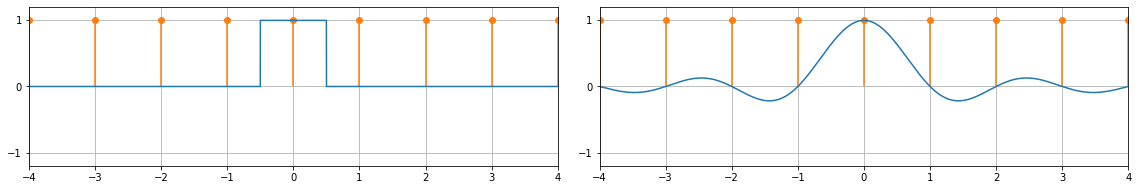

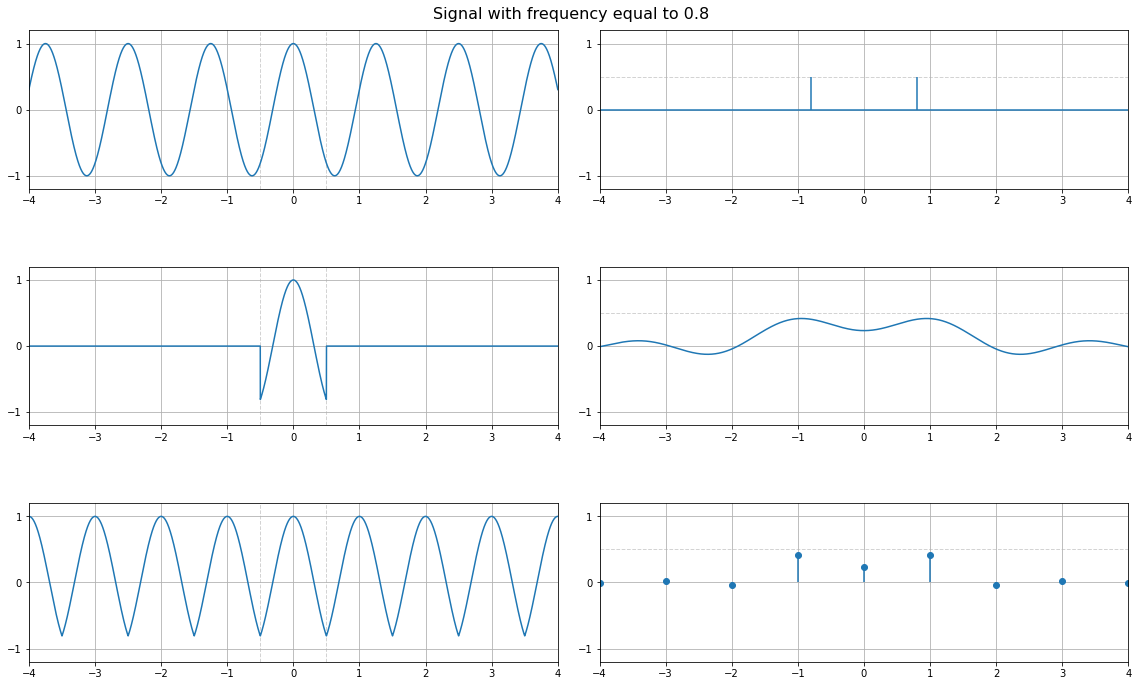

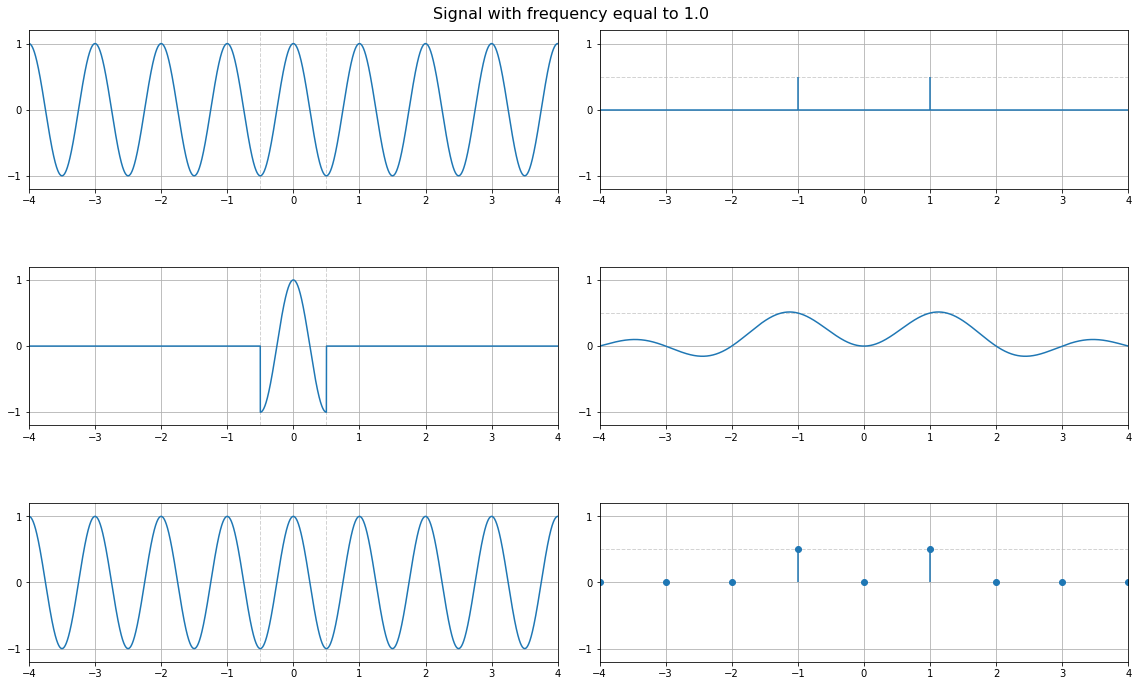

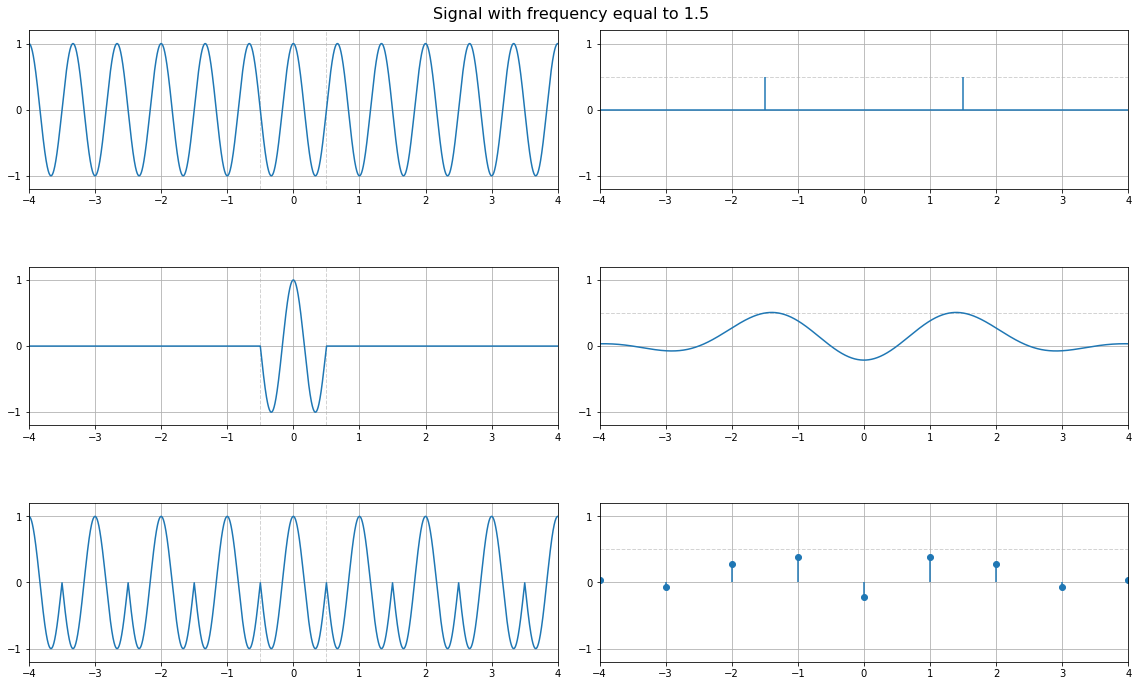

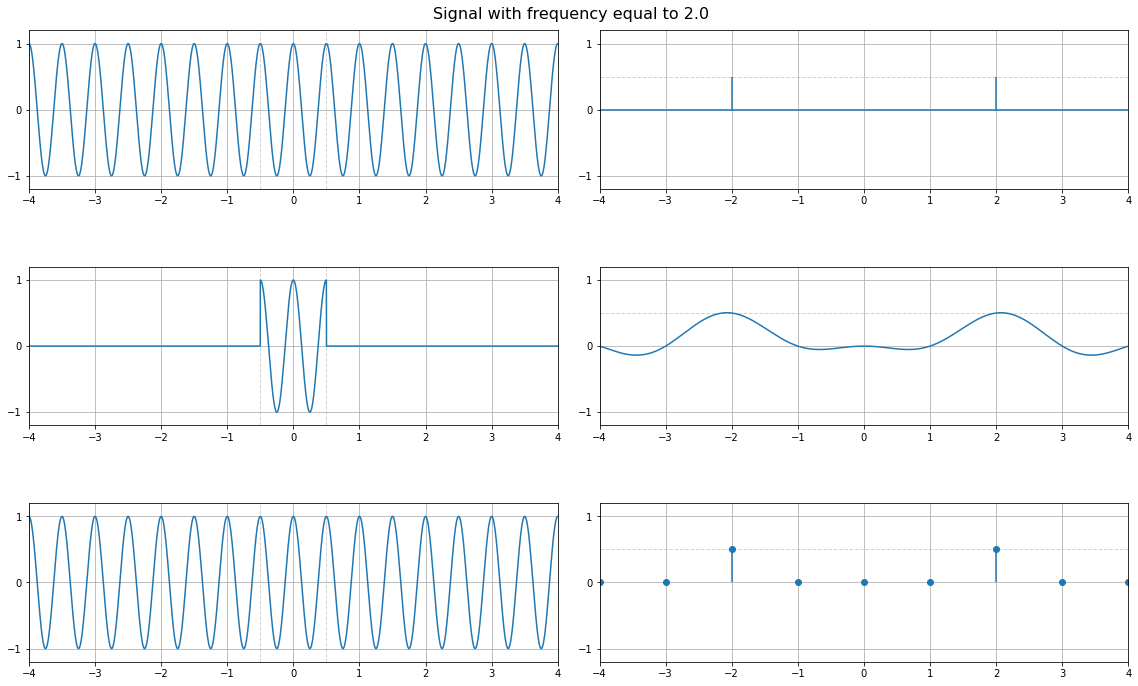

In [4]:
periods = 9
period_res = 1001
plot_res = period_res * periods

def sample_positions(res, size):
    indices = np.arange(res)
    return ((indices + 0.5) / res - 0.5) * size

x = sample_positions(plot_res, periods)
periodic_pulse = sample_positions(periods, periods)
box = np.abs(x) < 0.5

def example(frequency):
    signal = np.cos(2.0 * np.pi * frequency * x)
    windowed_signal = signal * box

    periodic_signal = np.zeros(plot_res)
    for i in range(periods):
        periodic_signal += np.roll(windowed_signal, i * period_res)

    fig, axs = pyplot.subplots(3, 2, figsize=(16, 10))
    pyplot.tight_layout()

    fig.suptitle('Signal with frequency equal to {:.1f}'.format(frequency), fontsize=16)

    for ax in axs.flat:
        ax.grid(True)
        ax.set_aspect('equal')
        ax.set_xlim(-4.0, 4.0)
        ax.set_xticks(np.linspace(-4, 4, 9))
        ax.set_ylim(-1.2, 1.2)
        ax.set_yticks([-1.0, 0.0, 1.0])

    for ax in axs[:, 0]:
        ax.vlines([-0.5, 0.5], -2.0, 2.0, linestyle='dashed', linewidth=1, color='lightgrey', zorder=-1)

    for ax in axs[:, 1]:
        ax.axhline(0.5, linestyle='dashed', linewidth=1, color='lightgrey', zorder=-1)

    axs[0, 0].plot(x, signal)
    axs[1, 0].plot(x, windowed_signal)
    axs[2, 0].plot(x, periodic_signal)

    axs[0, 1].vlines([frequency, -frequency], 0.0, 0.5)
    axs[0, 1].axhline()

    axs[1, 1].plot(x, 0.5 * (np.sinc(x - frequency) + np.sinc(x + frequency)))

    axs[2, 1].vlines(periodic_pulse, 0.0, 0.5 * (np.sinc(periodic_pulse - frequency) + np.sinc(periodic_pulse + frequency)))
    axs[2, 1].scatter(periodic_pulse, 0.5 * (np.sinc(periodic_pulse - frequency) + np.sinc(periodic_pulse + frequency)), zorder=2)

fig, axs = pyplot.subplots(1, 2, figsize=(16, 100))
pyplot.tight_layout()

for ax in axs.flat:
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_xlim(-4.0, 4.0)
    ax.set_xticks(np.linspace(-4, 4, 9))
    ax.set_ylim(-1.2, 1.2)
    ax.set_yticks([-1.0, 0.0, 1.0])

axs[0].plot(x, np.abs(x) < 0.5)
axs[0].vlines(periodic_pulse, 0.0, 1.0, color='tab:orange')
axs[0].scatter(periodic_pulse, [1]*periods, color='tab:orange', zorder=2)

axs[1].plot(x, np.sinc(x))
axs[1].vlines(periodic_pulse, 0.0, 1.0, color='tab:orange')
axs[1].scatter(periodic_pulse, [1]*periods, color='tab:orange', zorder=2)

example(0.8)
example(1.0)
example(1.5)
example(2.0)

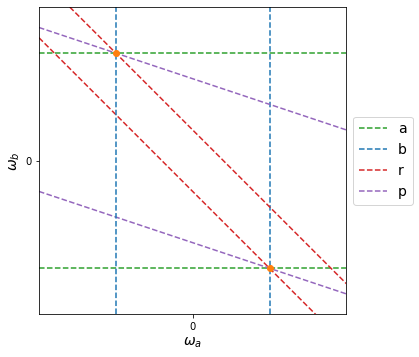

In [5]:
def plot_sinc_lines(ax, omega):
    ax.axhline(omega[1], linestyle='dashed', color='tab:green')
    ax.axvline(omega[0], linestyle='dashed', color='tab:blue')
    ax.axline(omega, omega + [1, -1], linestyle='dashed', color='tab:red')
    ax.axline(omega, omega + [1, -z_a/z_b], linestyle='dashed', color='tab:purple')
    ax.scatter(omega[0], omega[1], color='tab:orange', zorder=3)

fig, ax = pyplot.subplots(figsize=(5, 10))
pyplot.tight_layout()
ax.set_xlabel(r'$\omega_a$', fontsize=14)
ax.set_ylabel(r'$\omega_b$', fontsize=14)
ax.set_aspect('equal')
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(-1.0, 1.0)
plot_sinc_lines(ax, np.array([0.5, -0.7]))
plot_sinc_lines(ax, np.array([-0.5, 0.7]))
_ = ax.legend(['a', 'b', 'r', 'p'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

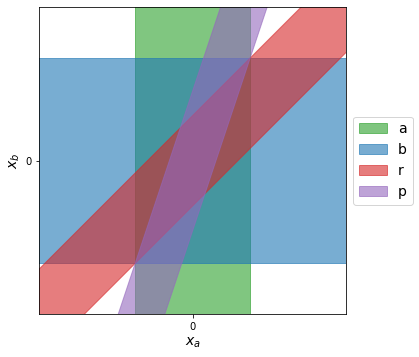

In [6]:
window_a = np.array([-0.5, 0.5]) * size_a
window_b = np.array([-0.5, 0.5]) * size_b
window_r = np.array([-0.5, 0.5]) * size_r
window_p = np.array([-0.5, 0.5]) * pupil_diameter

far_ends = np.array([100, -100, -100, 100])

window_r_a = np.repeat(window_r, 2) * z_a / z_r + far_ends
window_r_b = np.repeat(window_r, 2) * z_b / z_r + far_ends

window_p_a = far_ends * z_a / z_r + np.repeat(window_p, 2)
window_p_b = far_ends * z_b / z_r + np.repeat(window_p, 2)

fig, ax = pyplot.subplots(figsize=(5, 10))
pyplot.tight_layout()
ax.set_xlabel(r'$x_a$', fontsize=14)
ax.set_ylabel(r'$x_b$', fontsize=14)
ax.set_aspect('equal')
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_xlim(-11.0, 11.0)
ax.set_ylim(-11.0, 11.0)
ax.fill(np.repeat(window_a, 2), far_ends, alpha=0.6, color='tab:green', label='a')
ax.fill(far_ends, np.repeat(window_b, 2), alpha=0.6, color='tab:blue', label='b')
ax.fill(window_r_a, window_r_b, alpha=0.6, color='tab:red', label='r')
ax.fill(window_p_a, window_p_b, alpha=0.6, color='tab:purple', label='p')
_ = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

$L \cdot \text{box}_a \cdot \text{box}_b \cdot \text{box}_r \cdot \text{box}_p = L \cdot \text{box}_r \cdot \text{box}_p$

$\hat{L} * \text{sinc}_a * \text{sinc}_b * \text{sinc}_r * \text{sinc}_p = \hat{L} * \text{sinc}_r * \text{sinc}_p$

<br>

$((L \cdot \text{box}_a \cdot \text{box}_b) * H_{ab}) \cdot \text{box}_r \cdot \text{box}_p = \; ?$

$((\hat{L} * \text{sinc}_a * \text{sinc}_b) \cdot \hat{H}_{ab}) * \text{sinc}_r * \text{sinc}_p = \; ?$

<br>

$((L \cdot \text{box}_a \cdot \text{box}_b) \cdot \text{box}_r \cdot \text{box}_p) * H_{ab} = (L \cdot \text{box}_r \cdot \text{box}_p) * H_{ab}$

$((\hat{L} * \text{sinc}_a * \text{sinc}_b) * \text{sinc}_r * \text{sinc}_p) \cdot \hat{H}_{ab} = (\hat{L} * \text{sinc}_r * \text{sinc}_p) \cdot \hat{H}_{ab}$

<br>

$((L * H_{ab}) \cdot \text{box}_a \cdot \text{box}_b) \cdot \text{box}_r \cdot \text{box}_p = (L * H_{ab}) \cdot \text{box}_r \cdot \text{box}_p$

$((\hat{L} \cdot \hat{H}_{ab}) * \text{sinc}_a * \text{sinc}_b) * \text{sinc}_r * \text{sinc}_p = (\hat{L} \cdot \hat{H}_{ab}) * \text{sinc}_r * \text{sinc}_p$

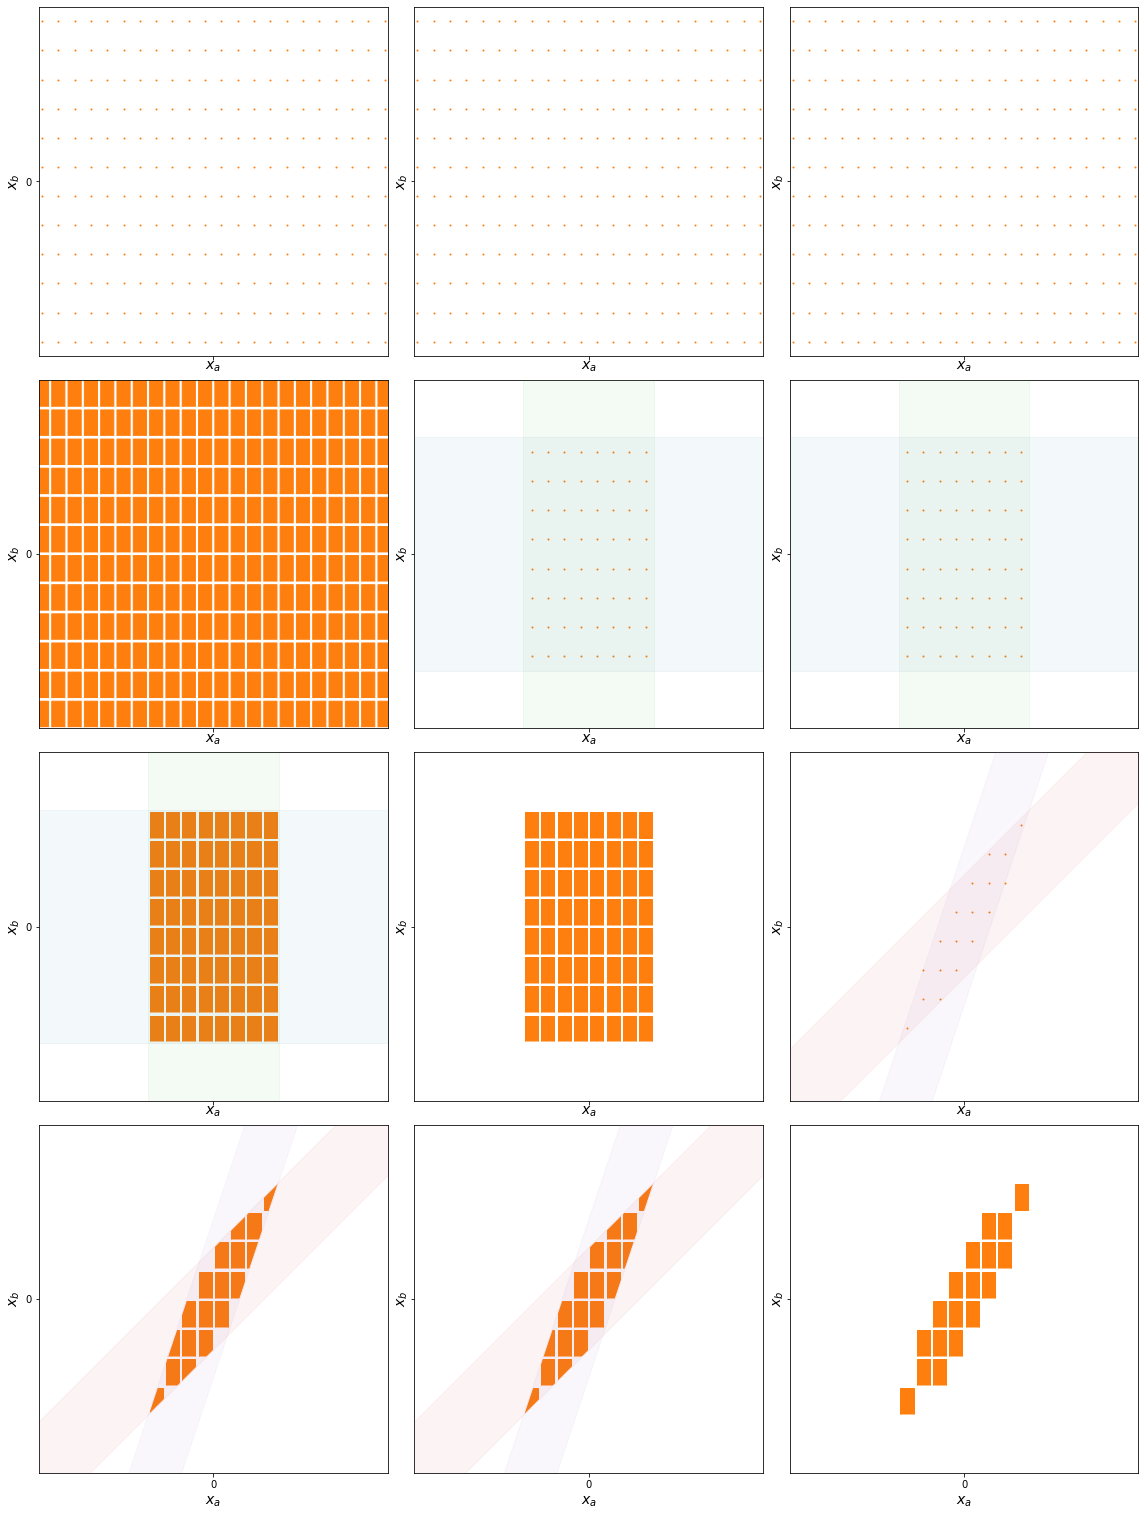

In [7]:
x_a = np.tile((np.arange(24) - 24/2 + 0.5) * pitch_a, 12)
x_b = np.repeat((np.arange(12) - 12/2 + 0.5) * pitch_b, 24)

wa_x_a = np.tile((np.arange(8) - 8/2 + 0.5) * pitch_a, 8)
wa_x_b = np.repeat((np.arange(8) - 8/2 + 0.5) * pitch_b, 8)

mask_rp = np.logical_and(np.abs(wa_x_b - wa_x_a)*z_r/(z_a - z_b) < size_r/2, np.abs(wa_x_a * z_b - wa_x_b * z_a)/(z_b - z_a) < pupil_diameter/2)

corner_a = (size_r * z_a / z_r + pupil_diameter)/2
corner_b = (size_r * z_b / z_r + pupil_diameter)/2

fig, axs = pyplot.subplots(4, 3, figsize=(16, 21), sharex=True, sharey=True)
pyplot.tight_layout()

for ax in axs.flat:
    ax.set_xlabel(r'$x_a$', fontsize=14)
    ax.set_ylabel(r'$x_b$', fontsize=14)
    ax.set_aspect('equal')
    ax.set_xticks([0])
    ax.set_yticks([0])
    ax.set_xlim(-11.0, 11.0)
    ax.set_ylim(-11.0, 11.0)

for ax in axs[(2, 1, 1), (0, 1, 2)]:
    ax.fill(np.repeat(window_a, 2), far_ends, alpha=0.05, color='tab:green', label='a', zorder=5)
    ax.fill(far_ends, np.repeat(window_b, 2), alpha=0.05, color='tab:blue', label='b', zorder=5)

for ax in axs[(3, 3, 2), (0, 1, 2)]:
    ax.fill(window_r_a, window_r_b, alpha=0.05, color='tab:red', label='r', zorder=5)
    ax.fill(window_p_a, window_p_b, alpha=0.05, color='tab:purple', label='p', zorder=5)

for ax in axs[0, :]:
    ax.scatter(x_a, x_b, color='tab:orange', s=1.0, zorder=3)

axs[1, 0].fill(np.repeat(x_a, 5) + np.tile(np.array([-1, -1, 1, 1, np.nan]) * (pitch_a * 0.5 - 0.1), 12*24), np.repeat(x_b, 5) + np.tile(np.array([-1, 1, 1, -1, np.nan]) * (pitch_b * 0.5 - 0.1), 12*24), color='tab:orange')

for ax in axs[1, (1, 2)]:
    ax.scatter(wa_x_a, wa_x_b, color='tab:orange', s=1.0, zorder=3)

for ax in axs[2, (0, 1)]:
    ax.fill(np.repeat(wa_x_a, 5) + np.tile(np.array([-1, -1, 1, 1, np.nan]) * (pitch_a * 0.5 - 0.1), 8*8), np.repeat(wa_x_b, 5) + np.tile(np.array([-1, 1, 1, -1, np.nan]) * (pitch_b * 0.5 - 0.1), 8*8), color='tab:orange')

axs[2, 2].scatter(wa_x_a[mask_rp], wa_x_b[mask_rp], color='tab:orange', s=1.0, zorder=3)

for ax in axs[3, :]:
    ax.fill(np.repeat(wa_x_a[mask_rp], 5) + np.tile(np.array([-1, -1, 1, 1, np.nan]) * (pitch_a * 0.5 - 0.1), 18), np.repeat(wa_x_b[mask_rp], 5) + np.tile(np.array([-1, 1, 1, -1, np.nan]) * (pitch_b * 0.5 - 0.1), 18), color='tab:orange')

for ax in axs[3, (0, 1)]:
    ax.fill([-10, size_a/2, -corner_a, -size_a/2], [10, size_b/2, -corner_b, -size_b/2], color='white')
    ax.fill([10, -size_a/2, corner_a, size_a/2], [-10, -size_b/2, corner_b, size_b/2], color='white')

$\Delta x_{a} =$ sample pitch of panel a

$s_{a} =$ sample window size of panel a

$\Delta\omega_{a} = \frac{1}{s_{a}} =$ frequency pitch of panel a

$\sigma_{a} = \frac{1}{\Delta x_{a}} = 2 \xi_{a} =$ frequency window size of panel a

<br>

$\sigma_{a} \geq \frac{-z_{r}}{z_{b} - z_{a}} \sigma_{r}$

<br>

$\sigma_{a} = \kappa_{1} \frac{-z_{r}}{z_{b} - z_{a}} \Delta\omega_{r} \;$ , $\; \kappa_{1} \in \mathbb{Z}^{+}$

$\sigma_{b} = \kappa_{2} \frac{-z_{r}}{z_{b} - z_{a}} \Delta\omega_{r} \;$ , $\; \kappa_{2} \in \mathbb{Z}^{+}$

<br>

$\sigma_{a} = \kappa_{3} \frac{z_b}{z_b - z_a} \Delta\omega_{p} \;$ , $\; \kappa_{3} \in \mathbb{Z}^{+}$

$\sigma_{b} = \kappa_{4} \frac{z_a}{z_b - z_a} \Delta\omega_{p} \;$ , $\; \kappa_{4} \in \mathbb{Z}^{+}$